***`Universidad de Sonora, Campus Hermosillo`***

---

***`Profesor: `*** *`Lizarraga Celaya Carlos`*

***`Materia: `*** *`Física Computacional`*

---

***`Trabajo: `*** *`Evaluación 2`*

---

***`Alumno: `*** *`Bonillas Miranda Akin`*

***`Número de Expediente: `*** *`219211360`*

***`Correo: `*** *`a219211360@unison.mx // akinbonillasmiranda@gmail.com`*

***`Número Telefónico: `*** *`662 368 2474`*

---

***`Grupo: `*** *`2`*

***`Carrera: `*** *`Licenciatura en Física`*

***`Semestre: `*** *`Cuarto Semestre`*

---

***`Lunes 05 de Abril de 2021, Hermosillo, Sonora`***

.

(5 de Abril de 2021)

Se pide resolver numéricamente la ecuación diferencial de un [oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal](https://en.wikipedia.org/wiki/Harmonic_oscillator#Sinusoidal_driving_force), con ayuda de la función *odeint* de *scipy.integrate*.

La ecuación diferencial del oscilador amortiguado es

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}

y $\zeta$ es la tasa de amortiguamiento dado por la expresión

\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}

siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire. 

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$). 

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:


* Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar. 
* Críticamente amortiguado ($\zeta = 1$).
* Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente. 
* Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular. 

# Problema 1:

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$: 

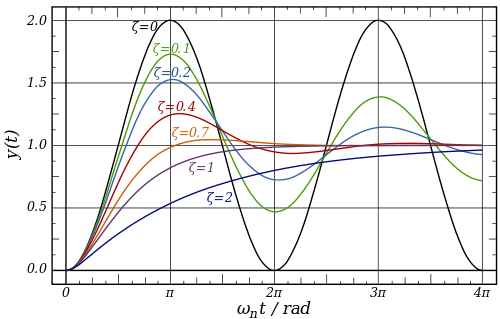

En este caso tengo una ecuación de segundo orden, la cual puedo convertir en un sistema de dos ecuaciones diferenciales de primer orden, definiendo la siguiente ecuación diferencial:

\begin{equation}
  \frac{dx}{dt} = v
\end{equation}

Por lo tanto, la ecuación original puedo reescribirla como:

\begin{equation}
  \frac{dv}{dt} + 2\zeta \omega_{n} v + \omega_{n}^{2}x = \frac{1}{m}F_{0}\sin{(\omega t)}
\end{equation}

Si despejamos la derivada de $v$ obtenemos el siguiente sistema de ecuaciones diferenciales:

\begin{equation}
  \frac{dx}{dt} = v \\
  \frac{dv}{dt} = - \omega_{n}^{2}x - 2\zeta \omega_{n} v +  \frac{1}{m}F_{0}\sin{(\omega t)}
\end{equation}

Sin embargo una de las condiciones es que $F_{0}$ es 0, por lo tanto

\begin{equation}
  \frac{dx}{dt} = v \\
  \frac{dv}{dt} = - \omega_{n}^{2}x - 2\zeta \omega_{n} v
\end{equation}

In [2]:
#========================== IMPORTAMOS LAS BIBLIOTECAS =========================

import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd

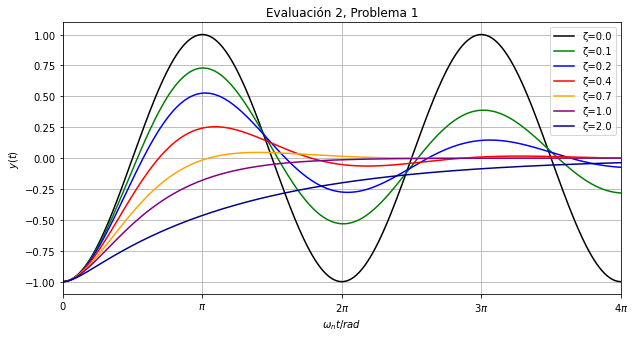

In [11]:
#===================== RESOLVEMOS EL SISTEMA DE ECUACIONES =====================

k = 9
m = 1

ωn = np.sqrt( k/m )

def SED( v, t, ζ, ωn ):
    x, dxdt = v
    dvdt = - 2*ζ*ωn*dxdt - (ωn**2)*x
    return [dxdt, dvdt]

# Intervalo sobre el cual se integrará

t0 = 0
tmax = 5
Npts = 500
t = np.linspace( t0, tmax, Npts ) # t = np.linspace ( 0, 4*np,pi, 500 )

# Condiciones iniciales

t0 = 0.0
y0 = [ -1.0, 0.0 ] # y_0 = [x_0, v_0] 

# Tasas de Amortiguamiento,  Soluciones con la función odeint

ζ0 = 0.0
ζ1 = 0.1
ζ2 = 0.2 
ζ3 = 0.4
ζ4 = 0.7
ζ5 = 1.0
ζ6 = 2.0

Solve0 = odeint( SED, y0, t, args = ( ζ0, ωn, ) )
Solve1 = odeint( SED, y0, t, args = ( ζ1, ωn, ) )
Solve2 = odeint( SED, y0, t, args = ( ζ2, ωn, ) )
Solve3 = odeint( SED, y0, t, args = ( ζ3, ωn, ) )
Solve4 = odeint( SED, y0, t, args = ( ζ4, ωn, ) )
Solve5 = odeint( SED, y0, t, args = ( ζ5, ωn, ) )
Solve6 = odeint( SED, y0, t, args = ( ζ6, ωn, ) )

# Graficamos las soluciones para diferentes tasas de amortiguamiento

plt.figure(figsize=(10,5))
plt.grid()


plt.title( "Evaluación 2, Problema 1" )
plt.xlabel( "$ω_{n}t/rad$" )
plt.xlim( 0, 4*np.pi )
plt.xticks( [ 0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi ], 
           [ r"0", r"$\pi$", r"$2\pi$", r"$3\pi$", r"$4\pi$" ] )
plt.ylabel( "$y(t)$" )

plt.plot( 3*t, Solve0[ :, 0 ], "black",    label = "ζ=0.0" )
plt.plot( 3*t, Solve1[ :, 0 ], "green",    label = "ζ=0.1" )
plt.plot( 3*t, Solve2[ :, 0 ], "blue",     label = "ζ=0.2" )
plt.plot( 3*t, Solve3[ :, 0 ], "red",      label = "ζ=0.4" )
plt.plot( 3*t, Solve4[ :, 0 ], "orange",   label = "ζ=0.7" )
plt.plot( 3*t, Solve5[ :, 0 ], "purple",   label = "ζ=1.0" )
plt.plot( 3*t, Solve6[ :, 0 ], "darkblue", label = "ζ=2.0" )

plt.legend(loc='best')
plt.show()

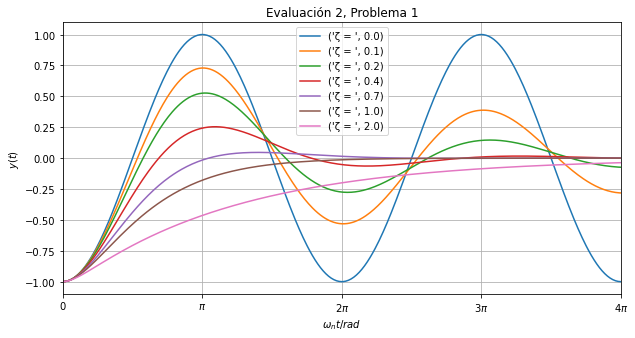

In [13]:
#===================== RESOLVEMOS EL SISTEMA DE ECUACIONES =====================

k = 9
m = 1

ωn = np.sqrt( k/m )

def SED( v, t, ζ, ωn ):
    x, dxdt = v
    dvdt = - 2*ζ*ωn*dxdt - (ωn**2)*x
    return [dxdt, dvdt]

# Intervalo sobre el cual se integrará

t0 = 0
tmax = 5
Npts = 500
t = np.linspace( t0, tmax, Npts ) # t = np.linspace ( 0, 4*np,pi, 500 )

# Condiciones iniciales

t0 = 0.0
y0 = [ -1.0, 0.0 ] # y_0 = [x_0, v_0] 

# Tasas de Amortiguamiento,  Soluciones con la función odeint

Z = [ 0.0, 0.1, 0.2, 0.4, 0.7, 1.0, 2.0 ]

plt.figure(figsize=(10,5))
plt.grid()

for ζ in Z:
  Solve0 = odeint( SED, y0, t, args = ( ζ, ωn, ) )
  plt.plot( 3*t, Solve0[ :, 0 ], label = ( "ζ = ", ζ ))


plt.title( "Evaluación 2, Problema 1" )
plt.xlabel( "$ω_{n}t/rad$" )
plt.xlim( 0, 4*np.pi )
plt.xticks( [ 0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi ], 
           [ r"0", r"$\pi$", r"$2\pi$", r"$3\pi$", r"$4\pi$" ] )
plt.ylabel( "$y(t)$" )

plt.legend(loc='best')
plt.show()

Se presenta una segunda versión del mismo código, donde se sacrifica la elección de colores (como en el primero) por una escritura más compacata y práctica.

# Problema 2:

Resuelva numéricamente el caso de oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$). 

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

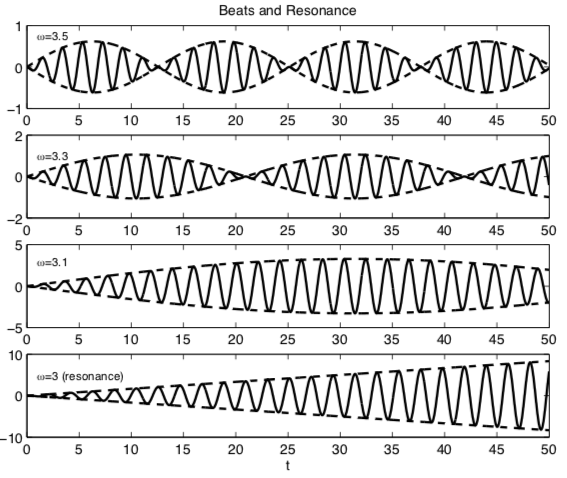

Para resolver este problema utilizaremos el sistema de ecuaciones obtenido antes de tomar en cuenta la condición de la fuerza nula, la cual es:

\begin{equation}
  \frac{dx}{dt} = v \\
  \frac{dv}{dt} = - \omega_{n}^{2}x - 2\zeta \omega_{n} v +  \frac{1}{m}F_{0}\sin{(\omega t)}
\end{equation}

Sin embargo, ya que $\zeta$ es igual a 0, el sistema nos queda de esta forma:

\begin{equation}
  \frac{dx}{dt} = v \\
  \frac{dv}{dt} = - \omega_{n}^{2}x +  \frac{1}{m}F_{0}\sin{(\omega t)}
\end{equation}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Unrecognized location 'best '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


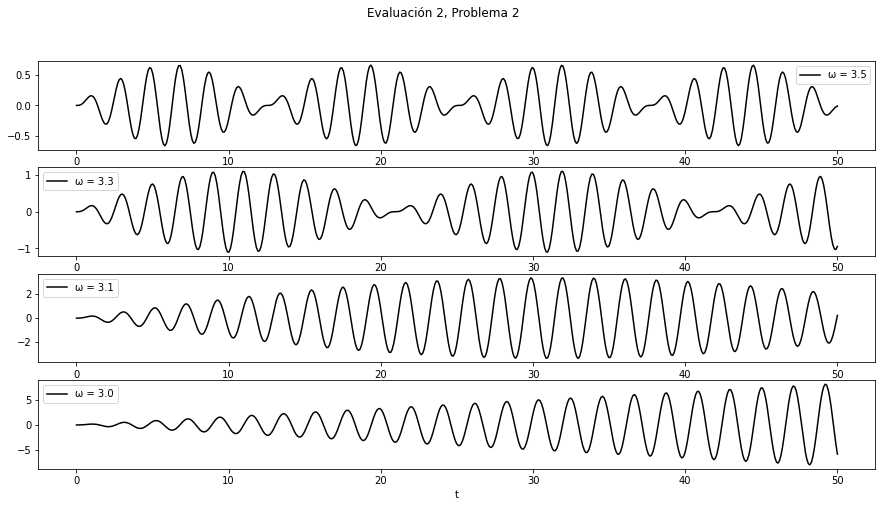

In [ ]:
#===================== RESOLVEMOS EL SISTEMA DE ECUACIONES =====================

k = 9
m = 1
ζ = 0.0
ωn = np.sqrt( k/m )
F0 = 1

def SED( v, t, ζ, ωn, ω, m, F0 ):
    x, dxdt = v
    dvdt = - ( ωn**2) *x + (1/m)*F0*np.sin( ω*t )
    return [dxdt, dvdt]

# Intervalo sobre el cual se integra
t0 = 0
tmax = 50
Npts = 500
t = np.linspace( t0, tmax, Npts ) # t = np.linspace( 0, 50, 500 )

# Condiciones iniciales

t0 = 0.0
y0 = [ 0.0, 0.0 ]

# Tasas de Amortiguamiento,  Soluciones con la función odeint

ω0 = 3.5
ω1 = 3.3
ω2 = 3.1
ω3 = 3.0

Solve0 = odeint( SED, y0, t, args = ( ζ, ωn, ω0, m, F0, ) )
Solve1 = odeint( SED, y0, t, args = ( ζ, ωn, ω1, m, F0, ) )
Solve2 = odeint( SED, y0, t, args = ( ζ, ωn, ω2, m, F0, ) )
Solve3 = odeint( SED, y0, t, args = ( ζ, ωn, ω3, m, F0, ) )

# Graficamos las soluciones para diferentes tasas de amortiguamiento

fig, axs = plt.subplots( 4, figsize = ( 15, 7.5 ) )
fig.suptitle( "Evaluación 2, Problema 2" )

axs[ 0 ].plot( t, Solve0[ :, 0 ], "black", label = "ω = 3.5" )
axs[ 1 ].plot( t, Solve1[ :, 0 ], "black", label = "ω = 3.3" )
axs[ 2 ].plot( t, Solve2[ :, 0 ], "black", label = "ω = 3.1" )
axs[ 3 ].plot( t, Solve3[ :, 0 ], "black", label = "ω = 3.0" )

plt.xlabel( "t" )

axs[ 0 ].legend( loc = "best" );
axs[ 1 ].legend( loc = "best" );
axs[ 2 ].legend( loc = "best ");
axs[ 3 ].legend( loc = "best" );

plt.show()

# Problema 3:

**Problema 3.**

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$. 

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado. 



Semejante al problema anterior, utilizaremos este sistema de ecuaciones:

\begin{equation}
  \frac{dx}{dt} = v \\
  \frac{dv}{dt} = - \omega_{n}^{2}x - 2\zeta \omega_{n} v +  \frac{1}{m}F_{0}\sin{(\omega t)}
\end{equation}

Y dado que en este caso la fuerza $F_{0}$ y $\zeta$ son diferentes de 0, el sistema queda intacto:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Unrecognized location 'best '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


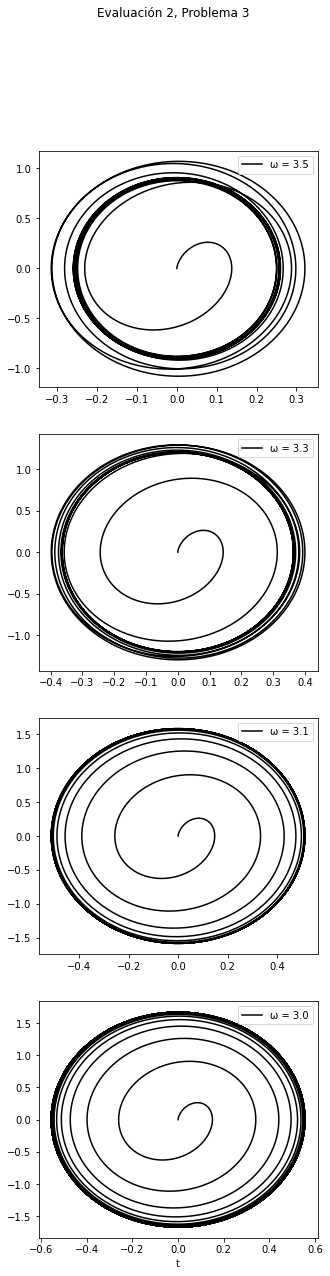

In [ ]:
#===================== RESOLVEMOS EL SISTEMA DE ECUACIONES =====================

k = 9
m = 1
ζ = 0.1
ωn = np.sqrt( k/m )
F0 = 1

def SED( v, t, ζ, ωn, ω, m, F0 ):
    x, dxdt = v
    dvdt = -2*ζ*ωn*dxdt - ( ωn**2) *x + (1/m)*F0*np.sin( ω*t )
    return [dxdt, dvdt]

# Intervalo sobre el cual se integra
t0 = 0
tmax = 50
Npts = 5000
t = np.linspace( t0, tmax, Npts ) # t = np.linspace( 0, 50, 500 )

# Condiciones iniciales

t0 = 0.0
y0 = [ 0.0, 0.0 ]

# Tasas de Amortiguamiento,  Soluciones con la función odeint

ω0 = 3.5
ω1 = 3.3
ω2 = 3.1
ω3 = 3.0

Solve0 = odeint( SED, y0, t, args = ( ζ, ωn, ω0, m, F0, ) )
Solve1 = odeint( SED, y0, t, args = ( ζ, ωn, ω1, m, F0, ) )
Solve2 = odeint( SED, y0, t, args = ( ζ, ωn, ω2, m, F0, ) )
Solve3 = odeint( SED, y0, t, args = ( ζ, ωn, ω3, m, F0, ) )

# Graficamos las soluciones para diferentes tasas de amortiguamiento

fig, axs = plt.subplots( 4, figsize = ( 5, 20 ) )
fig.suptitle( "Evaluación 2, Problema 3" )

axs[ 0 ].plot( Solve0[ :, 0 ], Solve0[ :, 1 ], "black", label = "ω = 3.5" )
axs[ 1 ].plot( Solve1[ :, 0 ], Solve1[ :, 1 ], "black", label = "ω = 3.3" )
axs[ 2 ].plot( Solve2[ :, 0 ], Solve2[ :, 1 ], "black", label = "ω = 3.1" )
axs[ 3 ].plot( Solve3[ :, 0 ], Solve3[ :, 1 ], "black", label = "ω = 3.0" )

plt.xlabel( "t" )

axs[ 0 ].legend( loc = "best" );
axs[ 1 ].legend( loc = "best" );
axs[ 2 ].legend( loc = "best ");
axs[ 3 ].legend( loc = "best" );

plt.show()